In [1]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Training data => 60,000 images


test data => 10,000 images

grey scale images (channel=1)


images    28x28

In [5]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(x_train[10].shape)

(28, 28)


In [ ]:
img=plt.imshow(x_train[10])
plt.show()

# Label
print( "The label for the img is ",y_train[10])

In [10]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [15]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### the images are in same size (28,28) so no need to resize

In [16]:
# Scaling the values

x_train=x_train/255
x_test=x_test/255

In [17]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building the Neural Network

In [19]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [25]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2996 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1387 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1013 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0814 - accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0586 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0493 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0387 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.033

In [26]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.9741


In [28]:
print(x_test.shape)

(10000, 28, 28)


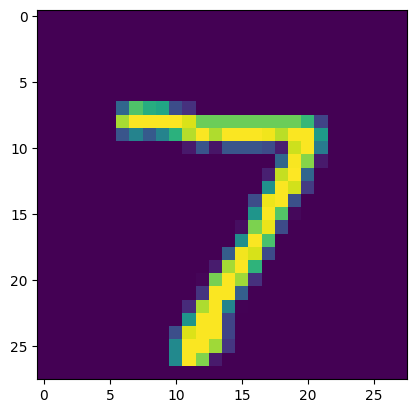

In [29]:
plt.imshow(x_test[0])
plt.show()

In [30]:
y_test[0]

7

In [33]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [35]:
print(y_pred.shape) # 10 means th 10 value listed below

(10000, 10)


In [36]:
print(y_pred[0])

[1.9779218e-07 1.7644827e-07 2.8269037e-06 1.5818600e-04 2.0432938e-09
 2.1219516e-07 1.3397153e-13 9.9979639e-01 2.7699838e-07 4.1776675e-05]


## model.predict() # gives the prediction probability 0-9 for particular data point

In [40]:
# converting values into labels

label_for_first_test_img=np.argmax(y_pred[0])
print(label_for_first_test_img)

7


In [42]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

## Confusion Matrix

In [43]:
conf_matrix=confusion_matrix(y_test,y_pred_labels)

In [44]:
print(conf_matrix)

tf.Tensor(
[[ 963    0    1    2    3    4    0    1    3    3]
 [   0 1122    4    1    0    1    2    1    4    0]
 [   4    0 1005    5    4    0    1    7    6    0]
 [   0    0    4  985    0    5    0    2    4   10]
 [   0    0    7    0  965    0    2    2    1    5]
 [   3    2    0   11    1  860    2    2    7    4]
 [   5    2    3    1    7   10  924    0    6    0]
 [   1    2    8    1    5    0    0 1006    1    4]
 [   1    1    5    6    3    7    0    6  942    3]
 [   1    2    0    5   13    4    0   12    3  969]], shape=(10, 10), dtype=int32)


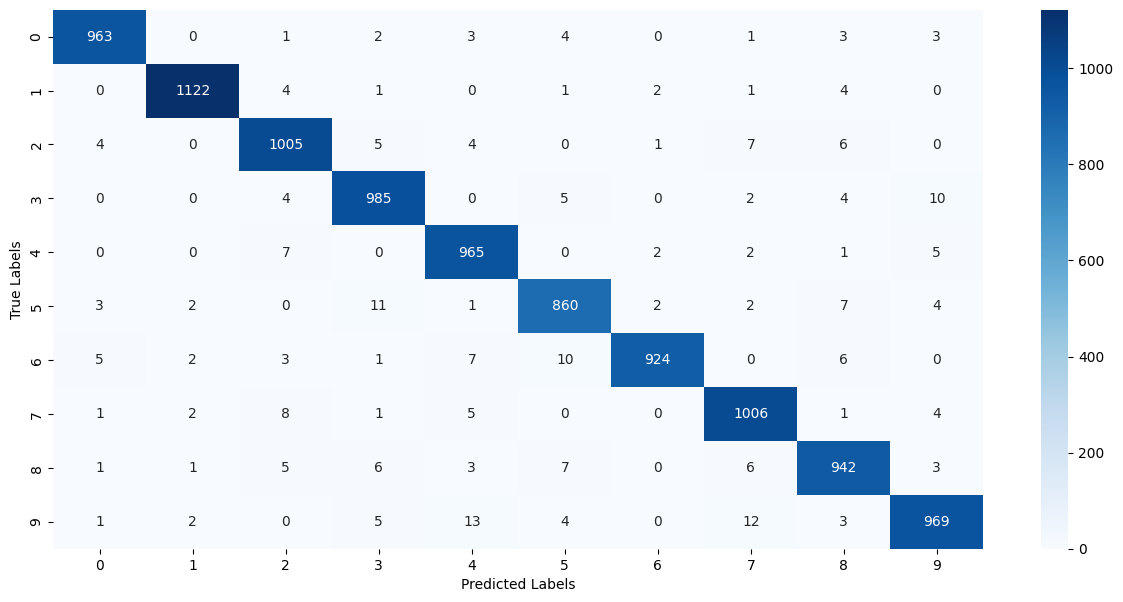

In [49]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Building predictive system

In [51]:
input_image_path=('/content/5.png')

input_image=cv2.imread(input_image_path)


In [52]:
type(input_image)

numpy.ndarray

In [53]:
input_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

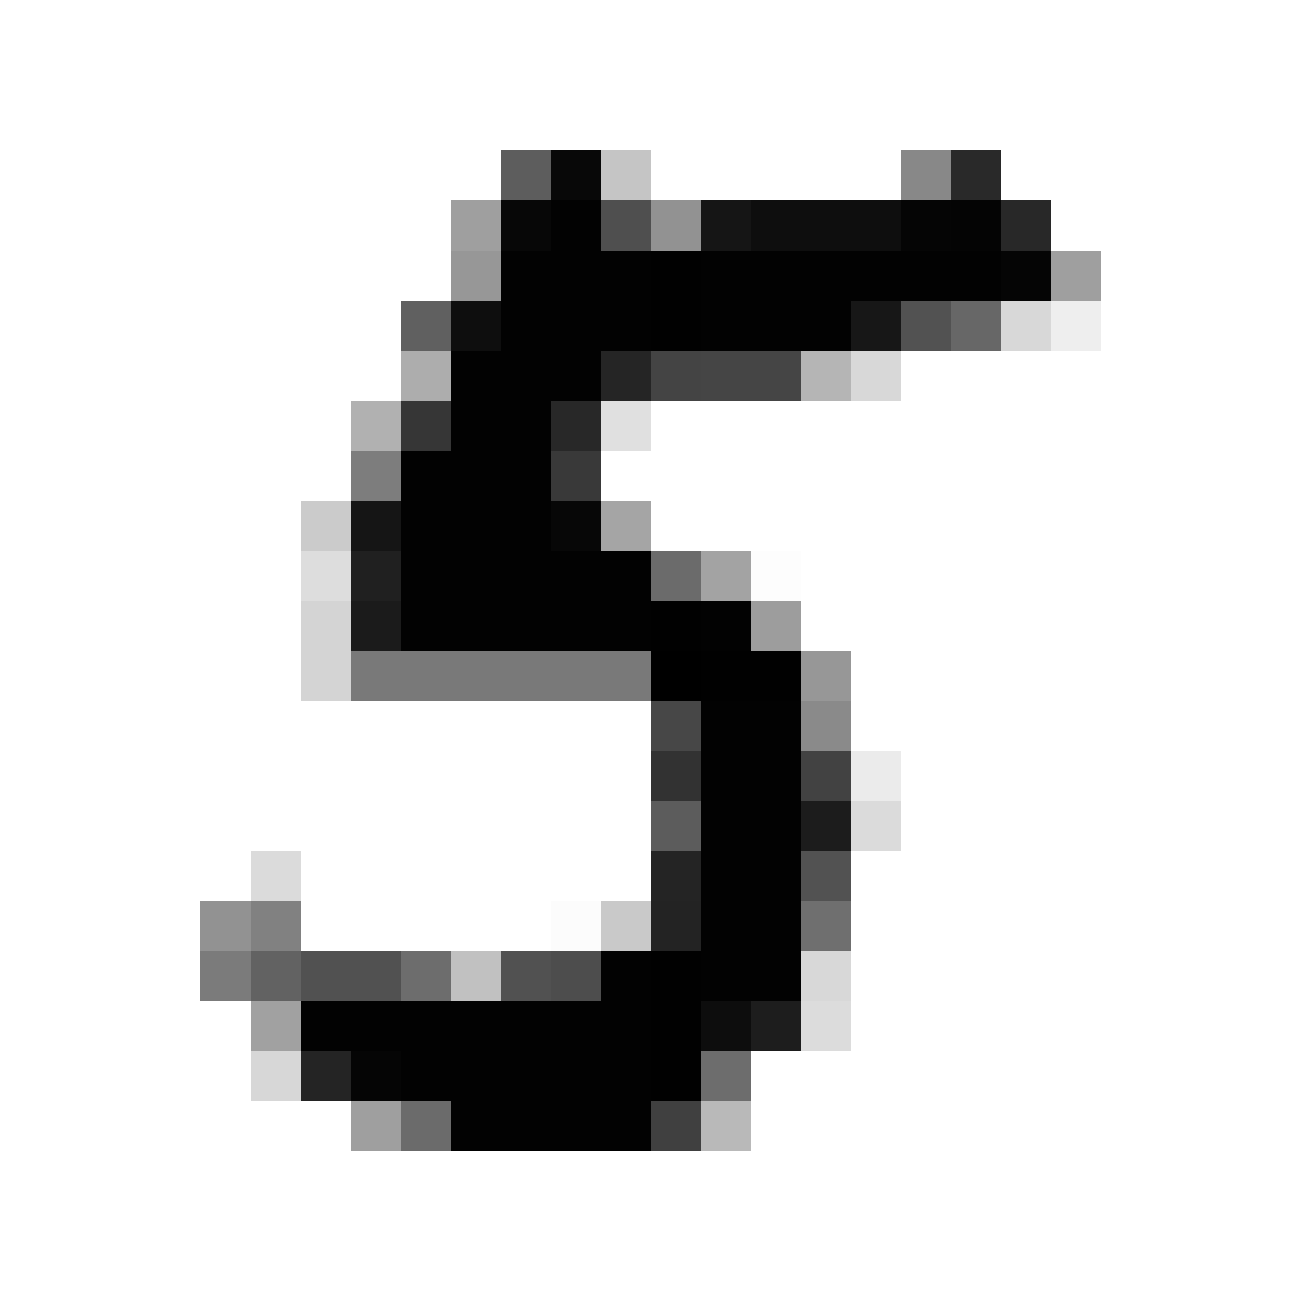

In [54]:
cv2_imshow(input_image)

In [55]:
input_image.shape

(1300, 1300, 3)

In [56]:
greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [59]:
greyscale.shape

(1300, 1300)

In [60]:
input_img_resize=cv2.resize(greyscale,(28,28))

In [61]:
input_img_resize.shape

(28, 28)

In [63]:
cv2_imshow(input_img_resize)

In [64]:
input_img_resize=input_img_resize/255

In [66]:
image_reshaped=np.reshape(input_img_resize,(1,28,28))   # 1 - one image to predict (1,28,28,3) 3 if rgb color

In [67]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

1/1 [==============================] - 0s 25ms/step
[[8.1041455e-32 3.0267188e-11 2.3799086e-14 1.2512687e-10 1.6006123e-38
  1.3113936e-17 1.3714790e-33 1.0000000e+00 0.0000000e+00 4.5173288e-27]]
7


## **Predictive system**

Path of the image to be predicted:  /content/5.png


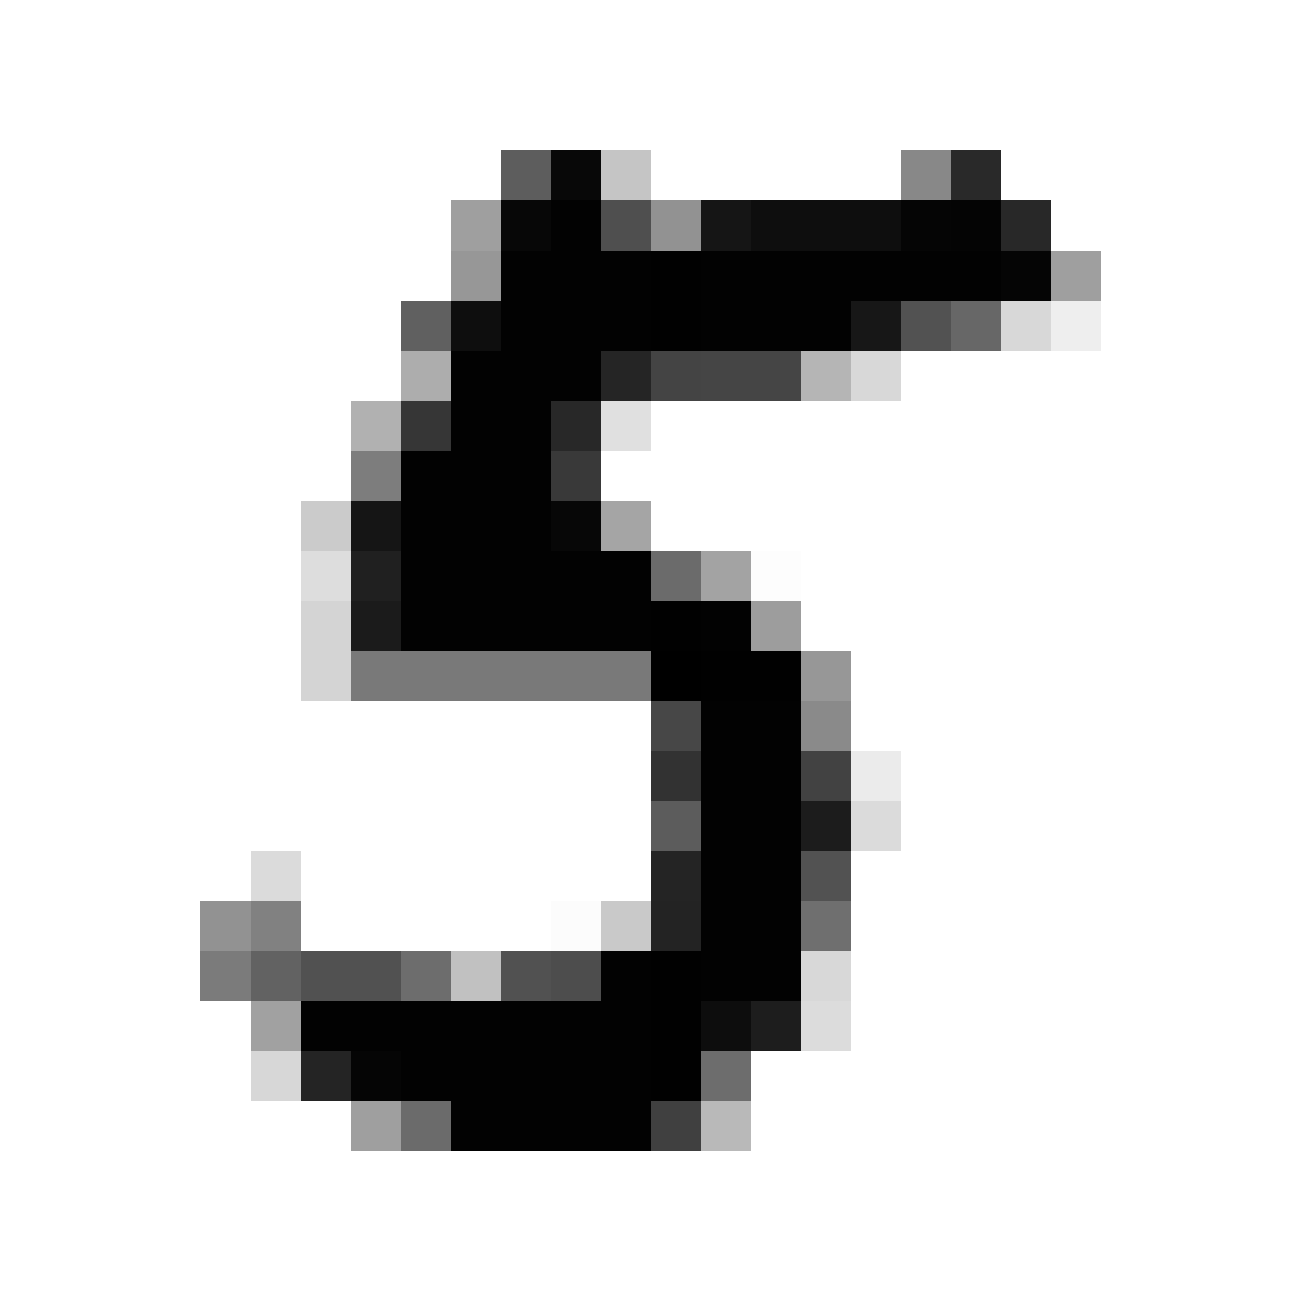

1/1 [==============================] - 0s 23ms/step
The hand written image is recognized as  7


In [68]:
input_image=input('Path of the image to be predicted:  ')

input_image=cv2.imread(input_image)

cv2_imshow(input_image)

greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_img_resize=cv2.resize(greyscale,(28,28))

input_img_resize=input_img_resize/255

image_reshaped=np.reshape(input_img_resize,(1,28,28))

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print('The hand written image is recognized as ',input_pred_label)